
# Linear Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a linear regression activity.

Workflow:



1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
    1. Split the data into *predicting variables* `X` and *target* `y`
        1. here we set the `random_state` variable to make the experiment *repeatable* 
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the 
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [1]:
# Code source: Claudio Sartori 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

## Load the dataset from a `.xlsx` file and show a short description

In [2]:
# This cell allows full compatibility between execution in Google Colab and in local
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()

In [3]:
# The file must be available in the same directory, 
# or uploaded in the Colab environment 
# in the execution of the previous cell
data_fn = 'FoodUK2014.xlsx'
df0 = pd.read_excel(data_fn)

## Data Exploration and preparation

##### Show a short description of the columns

In [5]:
df0.describe()

,hhsize,adults_n,children_n,totalexp,Year,income,AgeHRP,qmeat,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv
count,5114.000000,5114.000000,5114.000000,5114.000000,5114.0,5114.000000,5114.000000,4873.000000,3542.000000,5017.000000,4873.000000,3542.000000,5017.000000,4873.000000,3542.000000,5017.000000
mean,2.363707,1.841807,0.521901,519.898868,2014.0,679.542002,53.802698,10.475023,2.146960,25.727801,68.108342,19.635469,58.943391,7.072523,9.934257,2.508315
std,1.244704,0.743052,0.945622,411.543093,0.0,499.596175,16.187912,8.798118,2.034353,18.371345,57.347230,18.725096,44.751694,2.931651,5.485175,1.358023
min,1.000000,0.000000,0.000000,-246.916821,2014.0,0.000000,17.000000,0.086667,0.108333,0.060667,0.195000,0.000000,0.520000,0.357694,0.000000,0.159672
25%,1.000000,1.000000,0.000000,260.598783,2014.0,306.954000,41.000000,4.452500,0.866667,12.222167,29.141668,6.917083,27.148333,5.171614,5.979375,1.760525
50%,2.000000,2.000000,0.000000,426.977227,2014.0,548.086000,54.000000,8.374167,1.625000,22.245817,54.708336,13.736667,49.356667,6.575851,8.804690,2.254208
75%,3.000000,2.000000,1.000000,651.003763,2014.0,925.652500,67.000000,14.005333,2.816667,35.037167,90.480003,26.000000,78.281662,8.295746,12.520942,2.893561
max,9.000000,7.000000,7.000000,5859.877186,2014.0,2134.090000,80.000000,104.589333,41.348362,169.283829,803.465027,194.869995,480.024994,40.000000,46.315834,32.666668


In [7]:
df0.describe(include= "O")

,quarter,SexHRP,month,Gorx
count,5114,5114,5114,5114
unique,4,2,12,12
top,April to June,Male,February,South East
freq,1341,3050,445,736


In [6]:
df0.head()

,hhsize,quarter,adults_n,children_n,totalexp,SexHRP,month,Gorx,Year,income,AgeHRP,qmeat,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv
0,4,April to June,2,2,556.213795,Female,April,West Midlands,2014,985.655,34,13.745333,NaN,37.301331,96.156670,NaN,69.268333,6.995586,NaN,1.856993
1,4,July to September,2,2,737.685635,Male,August,North East,2014,824.520,38,6.045000,0.650000,30.203335,53.278336,6.500000,62.833336,8.813621,10.000000,2.080344
2,2,October to December,2,0,330.775000,Male,October,Northern Ireland,2014,271.925,54,11.780167,2.088667,17.032166,93.838333,28.491667,42.813335,7.965790,13.641079,2.513675
3,2,April to June,2,0,536.742283,Male,June,North West and Merseyside,2014,611.490,64,2.745167,NaN,4.008333,16.856667,NaN,5.416667,6.140490,NaN,1.351351
4,3,April to June,3,0,880.787157,Male,April,East Midlands,2014,496.040,64,12.857000,2.903333,7.345000,73.623337,16.921667,19.261665,5.726323,5.828358,2.622419


##### Show the number of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

In [23]:
print("Features\t N of NaNs")
print("-"*30)
print(df0.isna().sum())

Features	 N of NaNs
------------------------------
hhsize           0
quarter          0
adults_n         0
children_n       0
totalexp         0
SexHRP           0
month            0
Gorx             0
Year             0
income           0
AgeHRP           0
qmeat          241
qfish         1572
qfv             97
xmeat          241
xfish         1572
xfv             97
uvmeat         241
uvfish        1572
uvfv            97
dtype: int64


#### Drop rows with nulls

In [47]:
df = df0.dropna()       #returns a copy of the df without rows that contains NaN
print(f"After dropping rows with nulls the dataset has {df.shape[0]} rows")

After dropping rows with nulls the dataset has 3446 rows


##### Data transormation
- Convert the alphanumeric SexHRP into numeric 0 and 1
    - the `sklearn` machine learning procedures work only with numeric predicting
      attributes
- Generate two new columns as ratio of other columns
    - this is suggested by background information

In [48]:
df.SexHRP.replace(("Male", "Female"), (1, 0), inplace= True)
df.SexHRP
# print(df.columns)
df["qmeat_hhsize_ratio"] = df.qmeat/df.hhsize
df["income_hhsize_ratio"] = df.income/df.hhsize


##### Use only the columns that the experts consider interesting
This is suggested by background information

In [49]:
df = df[["adults_n", "children_n","SexHRP","AgeHRP","qmeat_hhsize_ratio", "income_hhsize_ratio", "uvmeat"]]
df.head()

,adults_n,children_n,SexHRP,AgeHRP,qmeat_hhsize_ratio,income_hhsize_ratio,uvmeat
1,2,2,1,38,1.511250,206.130000,8.813621
2,2,0,1,54,5.890083,135.962500,7.965790
4,3,0,1,64,4.285667,165.346667,5.726323
5,2,2,1,70,8.968250,66.632500,8.451528
7,3,0,1,64,4.079111,134.393333,5.904745


## Choose the target and split the data into *predicting variables* `X` and *target* `y`

In [50]:
target = "qmeat_hhsize_ratio"
Y = df[target]
X = df.drop(target, axis=1)

## Show the two dimensional scatter plots for all the predicting variables with respect to the target

In [51]:
ncols=3
import math
nrows = math.ceil((df.shape[1]-1)/ncols)
figwidth = ncols * 7
figheigth = nrows*5


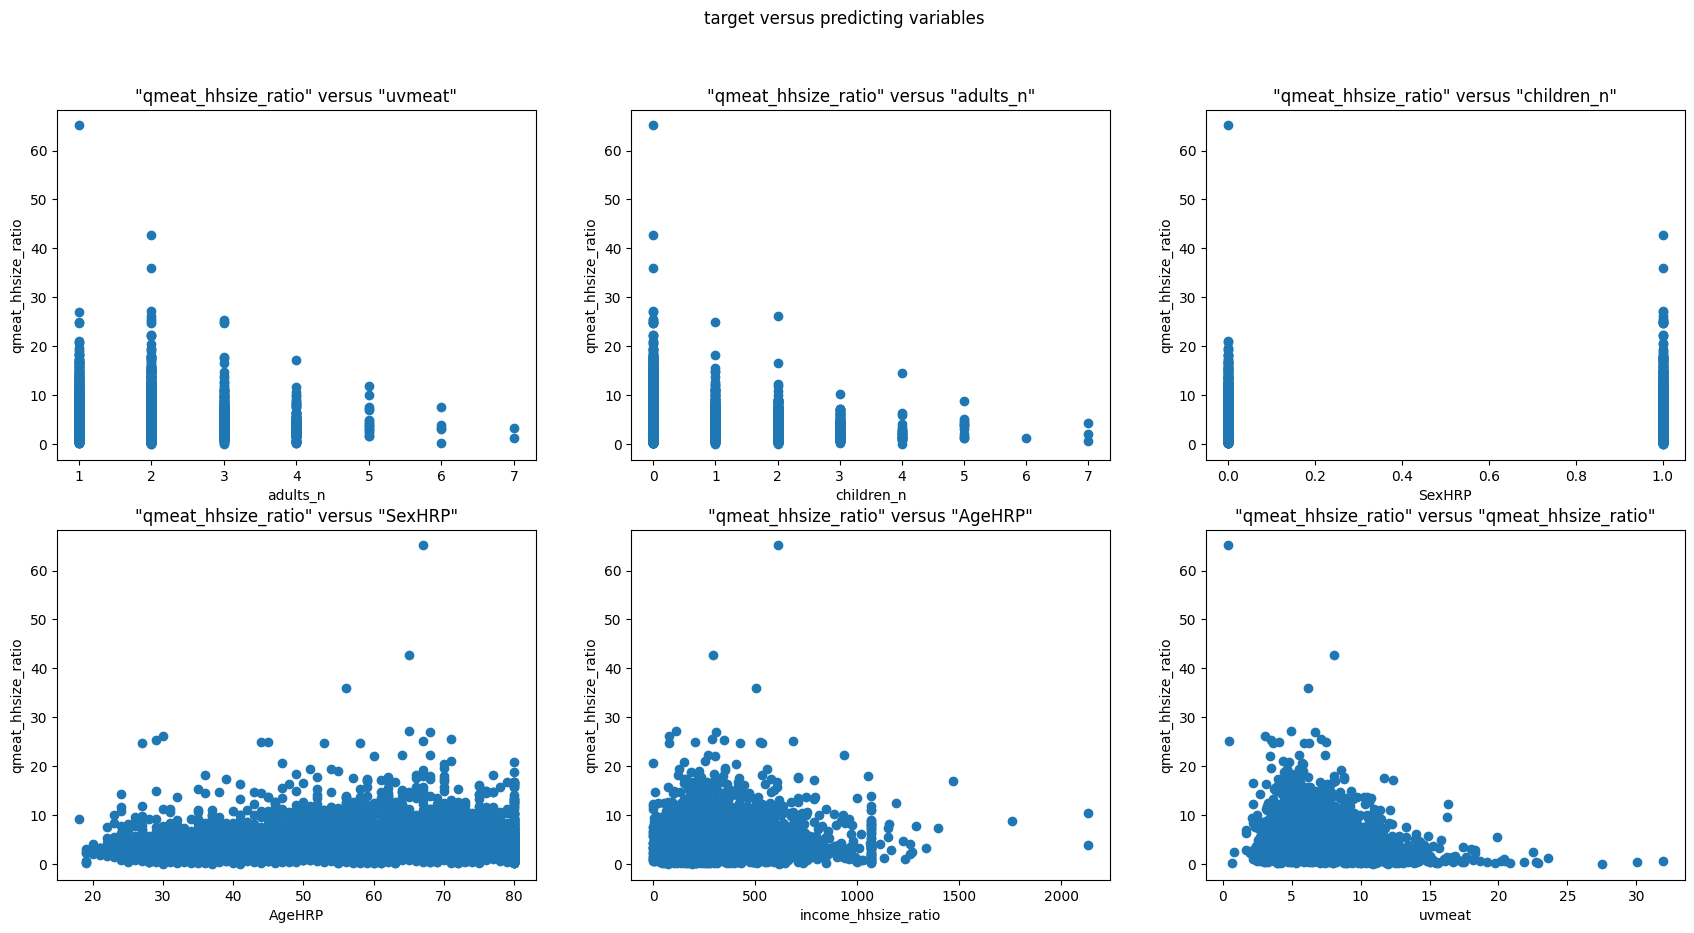

In [53]:
plt.figure(figsize=(figwidth, figheigth))
plt.suptitle("target versus predicting variables")
for i, col in enumerate(X.columns):
    plt.subplot(nrows, ncols, i + 1)
    plt.title(f"\"{target}\" versus \"{df.columns[i-1]}\"")
    plt.scatter(X[col], Y)
    plt.ylabel(target)
    plt.xlabel(col)

### Show the *_p-values_* of the target with respect to the variables

In [55]:
from sklearn.feature_selection import f_regression
# Your code here
feature, pvalues = f_regression(X, Y)
p_values_show = pd.DataFrame({'Variable': X.columns, 'p-value': pvalues})
p_values_show

,Variable,p-value
0,adults_n,1.415945e-05
1,children_n,1.077386e-30
2,SexHRP,8.429827e-02
3,AgeHRP,1.710126e-21
4,income_hhsize_ratio,1.211099e-03
5,uvmeat,4.789746e-52


## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


In [33]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state= random_state)
print(f"Training set and test set have {Ytrain.shape[0]} and {Ytest.shape[0]} elements respectively")

Training set and test set have 2584 and 862 elements respectively


### Consider a reduced dataset containing the chosen variable and the target

In [34]:
chosen_variable = X.columns[4]

Xtrain_r = Xtrain[[chosen_variable]]  # [[ ... ]] double square brackets are for creating another data frame. otherwise, it returns a sequence. The difference is the shape!
Xtest_r  = Xtest [[chosen_variable]]
# Xtrain_r = np.array(Xtrain_r).reshape(-1,1)
# Xtest_r = np.array(Xtest_r).reshape(-1,1)

### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

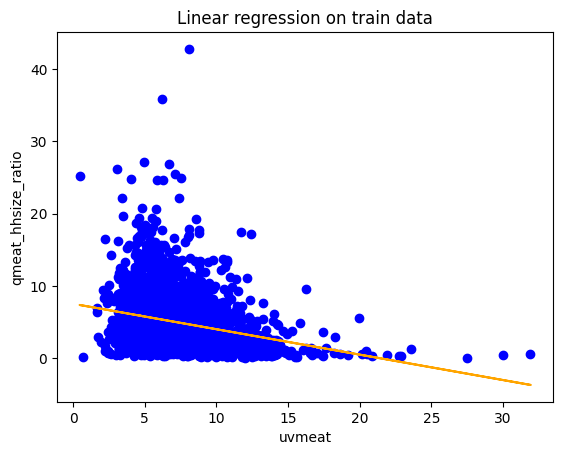

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain_r, Ytrain)
Y_pred_train = model.predict(Xtrain_r)
Y_pred_test = model.predict(Xtest_r)

plt.title("Linear regression on train data")
plt.xlabel(chosen_variable)
plt.ylabel(target)
plt.scatter(Xtrain_r, Ytrain, color= "blue")
plt.plot(Xtrain_r, Y_pred_train, "-", color= "orange")
plt.show()

#### Compute the regression coefficients and the quality measures
Create a function to compute the F-statistic and p-value of the regression model

In [60]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def f_test(y_true, y_pred, n_var, n_obs):
    """
    The F-test for linear regression tests whether any of the independent variables in a multiple linear regression model are significant.
    y_true
    t_pred
    n_var == number of regression variables
    n_obs == number of observations (examples)
    """
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs           # number of observations
    p = n_var + 1       # number of regression parameters = number of columns + bias
    y_avg = np.mean(y_true)
    SSM = np.sum((y_pred - y_avg)**2)       # Corrected Sum of Squares for Model
    SSE = np.sum((y_pred - y_true)**2)      # Sum of Squares for Error
    SST = np.sum((y_true - y_avg)**2)       # Corrected Sum of Squares Total
    DFM = p - 1         # degrees of freedom for the Model
    DFE = n - p         # degrees of freedom for the Error
    DFT = n - 1         # degrees of freedom in total
    MSM = SSM / DFM         # Mean of Squares for Model
    MSE = SSE / DFE         # Mean of Squares for Error
    MST = SST / DFT         # Mean of Squares total
    R2 = 1 - SSE / SST      # R^2 value
    F = MSM / MSE           #F test statistic
    p = 1-scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic 
    return F, p
    

#### Compute the statistical significance of the model

In [68]:
f_stat_uni, p_val_uni = f_test(Ytrain, Y_pred_train, Xtrain_r.shape[1], Xtrain_r.shape[0])
intercept_uni = model.intercept_[0]
coeff_uni = model.coef_[0,0]
rmse_uni = mean_squared_error(Ytest, Y_pred_test, squared= False)
r2_uni = r2_score(Ytest, Y_pred_test)

statistical_significance_uni = pd.DataFrame({"Univariate Linear - Value": [intercept_uni, coeff_uni, rmse_uni, r2_uni, f_stat_uni, p_val_uni]},
                                            index = [f'Intercept for "{target}"', f'Coefficient for "{target}"', "rmse", "r2", "f-statistic", "p-value"])
statistical_significance_uni

,Univariate Linear - Value
"Intercept for ""qmeat_hhsize_ratio""",7.514601e+00
"Coefficient for ""qmeat_hhsize_ratio""",-3.518952e-01
rmse,3.882669e+00
r2,5.857732e-02
f-statistic,1.841393e+02
p-value,1.110223e-16


## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

In [75]:
model_2 = LinearRegression()
model_2.fit(Xtrain, Ytrain)

Y_pred_train_2 = model_2.predict(Xtrain)
Y_pred_test_2 = model_2.predict(Xtest)

### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting. 

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

In [72]:
coefficients_df = pd.DataFrame({"Variable": X.columns, "Coefficient": model_2.coef_[0]})
coefficients_df

,Variable,Coefficient
0,adults_n,-0.340699
1,children_n,-0.642617
2,SexHRP,0.326706
3,AgeHRP,0.016193
4,income_hhsize_ratio,-0.385138
5,uvmeat,0.000969


#### Compute the statistical significance

In [74]:
_, pvalues = f_regression(Xtrain, Y_pred_train_2)
p_values_show = pd.DataFrame({'Variable': X.columns, 'p-value': pvalues})
p_values_show

,Variable,p-value
0,adults_n,8.287955e-25
1,children_n,5.773255e-210
2,SexHRP,3.876514e-07
3,AgeHRP,1.799147e-139
4,income_hhsize_ratio,0.000000e+00
5,uvmeat,2.676936e-10


#### Compute the quality measures

In [78]:
f_stat_multi, p_val_multi = f_test(Ytrain, Y_pred_train_2, Xtrain.shape[1], Xtrain.shape[0])
rmse_multi = mean_squared_error(Ytest, Y_pred_test, squared= False)
r2_multi = r2_score(Ytest, Y_pred_test)

statistical_significance_multi = pd.DataFrame({"Multivariate Linear - Value": [rmse_multi, r2_multi, f_stat_multi, p_val_multi]},
                                            index = ["rmse", "r2", "f-statistic", "p-value"])
statistical_significance_multi

,Multivariate Linear - Value
rmse,3.882669e+00
r2,5.857732e-02
f-statistic,6.066796e+01
p-value,1.110223e-16


## Decision Tree Multivariate Regresson

In [79]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor

#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

In [82]:
treemodel = DecisionTreeRegressor(random_state= random_state)
treemodel.fit(Xtrain, Ytrain)

max_depth = treemodel.tree_.max_depth
print(f"The maximum depth of the full Decision Tree Regressor is {max_depth}")
#??????????????????????????????????????????????????????????????????????????????????????

The maximum depth of the full Decision Tree Regressor is 33


#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

In [103]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth": list(range(1, max_depth))}
gscv = GridSearchCV(estimator= DecisionTreeRegressor(random_state= random_state), param_grid= params)

# The grid search Cross Validation takes the dict of parameters relative to the estimator. 
# The key must be the name of the hyperparameter; the values are the list of the possible values of that hyperparameter

gscv.fit(Xtrain, Ytrain)

# When fit --> it runs all the possible combinations and then checks the one with the best result.
# .best_estimator returns the best model (class of the model)

dt_best = gscv.best_estimator_
best_depth = dt_best.tree_.max_depth
print(f"The optimal maximum depth for the decision tree is {best_depth}")

The optimal maximum depth for the decision tree is 2


In [91]:
y_pred_dtr = dt_best.predict(Xtest)

rmse_dt = mean_squared_error(Ytest, y_pred_dtr, squared= False)

print(f"Decision Tree Regression - RMSE = {rmse_dt}")

Decision Tree Regression - RMSE = 3.876006183139189


#### Show the tree

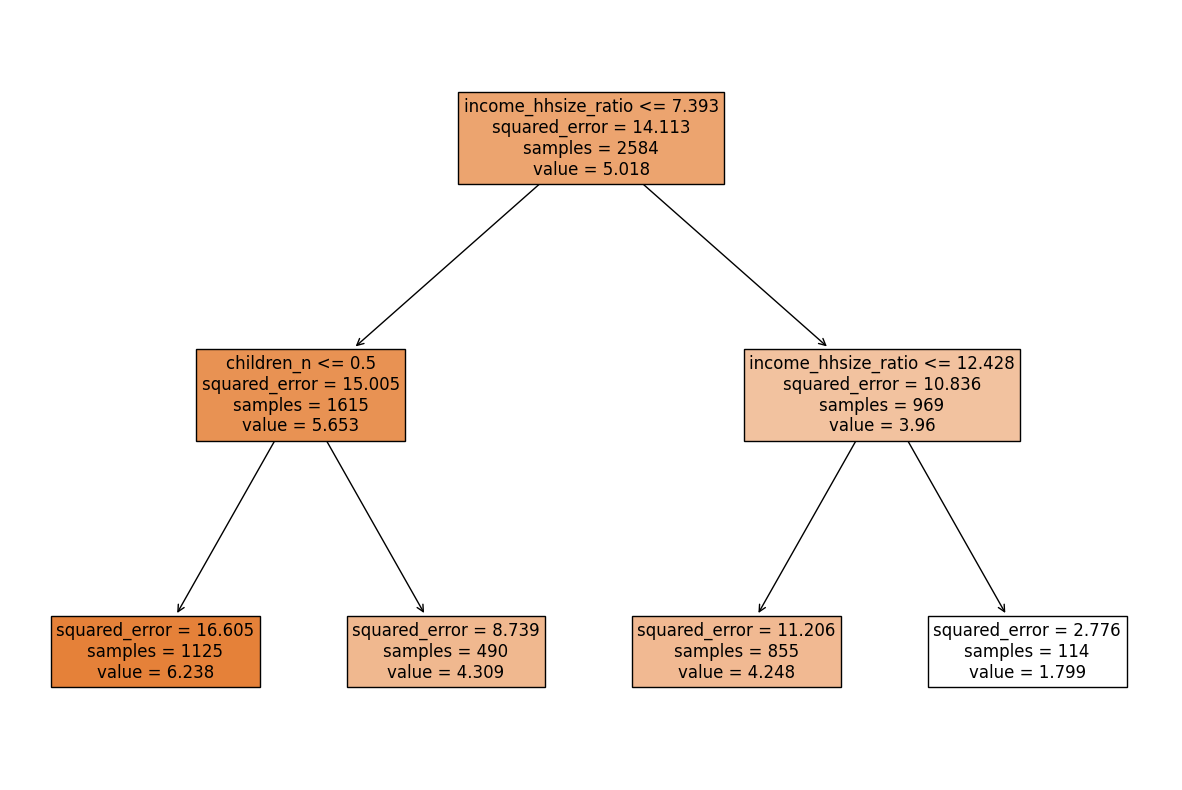

In [100]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
# Your code here

figure(figsize=(15, 10))
########################################################################
plot_tree(dt_best, filled= True, feature_names= X.columns, fontsize= 12)
########################################################################
plt.show()

## Random Forest Multivariate Regresson
Create a Random forest regressor and fit it on the complete dataset.

For simplicity use the max_depth found in the Decision tree regressor to perform a cross validation and find the best depth for this model.

In [105]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state= random_state)

# params = {"max_depth": list(range(1, max_depth))}  as before
gscv = GridSearchCV(rfr, param_grid= params, scoring= 'neg_mean_squared_error') # look for minimum squared error
gscv.fit(Xtrain, Ytrain)

rf_best = gscv.best_estimator_
best_depth = rf_best.max_depth
print(f"The optimal maximum depth for the trees in the random forest is {best_depth}")

The optimal maximum depth for the trees in the random forest is 3


In [106]:
y_pred_rf = rf_best.predict(Xtest)

rmse_rf = mean_squared_error(Ytest, y_pred_rf, squared= False)

print(f"Decision Tree Regression - RMSE = {rmse_rf}")

Decision Tree Regression - RMSE = 3.6720025930535343


## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 
- the p-value suggests the acceptance of both models
### Decision Tree and Random Forest regression
- Decistion Tree has an RMSE slightly higher than multivariate linear regression
- Random Forest has an RMSE slightly lower than multivariate linear regression


## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with the other two columns and comment the results